In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path

%matplotlib inline
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams['font.size'] = 16

In [12]:
users = ["Aaron", "Brian", "Kenn", "Liwen", "Raymond"]
user_df = {u:pd.read_csv(f"data/user_scores/{u}.csv") for u in users}

In [19]:
user_df["Aaron"].head()

,Title,Score
0,Get Out,7.8
1,Mulholland Drive,8.5
2,Breadwinner,8.0
3,First Man,8.0
4,Cloud Atlas,5.0


In [13]:
disc_df = pd.read_csv("data/Discussions.csv")

In [103]:
watch_info_df = pd.read_csv("data/watch_info.csv")

In [43]:
for u in users:
    disc_df[u] = disc_df["Title"].map(user_df[u].set_index('Title')['Score'])

In [55]:
disc_df["Average"] = np.mean(disc_df[users], axis=1)

In [57]:
disc_df.head()

,Title,Type,Discussion Date,Chosen By,Aaron,Brian,Kenn,Liwen,Raymond,Average
0,Get Out,watch,24/02/2019,Liwen,7.8,8.5,8.0,8.0,NaN,8.075
1,Mulholland Drive,watch,03/03/2019,Kenn,8.5,9.3,8.5,8.8,NaN,8.775
2,Breadwinner,watch,10/03/2019,Aaron,8.0,7.5,6.8,7.8,NaN,7.525
3,First Man,watch,17/03/2019,Brian,8.0,8.4,8.8,8.0,NaN,8.300
4,Cloud Atlas,watch,24/03/2019,Liwen,5.0,7.1,5.0,8.3,NaN,6.350


In [77]:
disc_df.groupby("Chosen By")["Average"].mean()

Chosen By
Aaron      7.477882
Brian      8.182935
Kenn       7.769583
Liwen      8.193889
Raymond    7.680208
Name: Average, dtype: float64

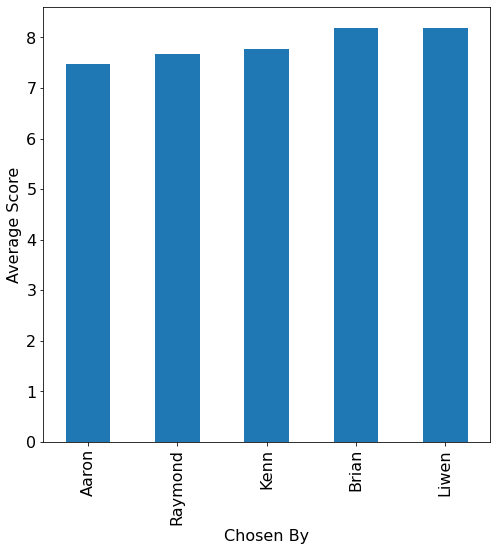

In [78]:
ax = disc_df.groupby("Chosen By")["Average"].mean().sort_values().plot(kind="bar")
ax.set_ylabel("Average Score")
plt.show()

In [82]:
disc_df["Title"].count()

101

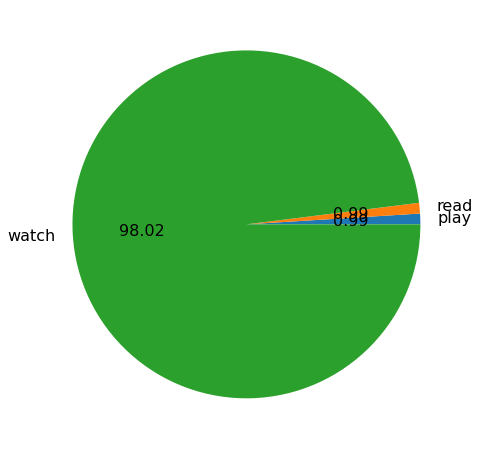

In [92]:
ax = disc_df.groupby("Type")["Title"].count().plot(kind="pie", autopct='%.2f');
ax.set_ylabel("");

In [95]:
start_date = disc_df[disc_df["Title"] == "Get Out"]["Discussion Date"][0]
start_date = datetime.strptime(start_date, "%d/%m/%Y")

In [102]:
total_time = datetime.today() - start_date
total_time.days

882

In [106]:
watch_info_df["Runtime"].sum()

11759